# Connecting

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Loading data & Modules

In [2]:
!pip install country_converter --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco

In [4]:
df = pd.read_csv("/content/drive/MyDrive/long_format_annual_surface_temp.csv")
df.head()

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,F1961,-0.113
1,Albania,AL,F1961,0.627
2,Algeria,DZ,F1961,0.164
3,American Samoa,AS,F1961,0.079
4,"Andorra, Principality of",AD,F1961,0.736


# Data Understanding

In [5]:
df.shape

(11222, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      11222 non-null  object 
 1   ISO2         11222 non-null  object 
 2   Year         11222 non-null  object 
 3   Temperature  11222 non-null  float64
dtypes: float64(1), object(3)
memory usage: 350.8+ KB


In [7]:
df.isnull().sum()

Country        0
ISO2           0
Year           0
Temperature    0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Preparation

### removing F in Year column

In [9]:
df["Year"] = df["Year"].str.lstrip("F").astype(int)
df.head()

,Country,ISO2,Year,Temperature
0,"Afghanistan, Islamic Rep. of",AF,1961,-0.113
1,Albania,AL,1961,0.627
2,Algeria,DZ,1961,0.164
3,American Samoa,AS,1961,0.079
4,"Andorra, Principality of",AD,1961,0.736


### making Country column more understandable

In [10]:
df["Country"] = coco.convert(names = df["Country"], to = "name_short")
df.head()

,Country,ISO2,Year,Temperature
0,Afghanistan,AF,1961,-0.113
1,Albania,AL,1961,0.627
2,Algeria,DZ,1961,0.164
3,American Samoa,AS,1961,0.079
4,Andorra,AD,1961,0.736


### Creating continent Column

In [11]:
df["Continent"] = coco.convert(names = df["Country"] , to = "continent" )
df.head()

,Country,ISO2,Year,Temperature,Continent
0,Afghanistan,AF,1961,-0.113,Asia
1,Albania,AL,1961,0.627,Europe
2,Algeria,DZ,1961,0.164,Africa
3,American Samoa,AS,1961,0.079,Oceania
4,Andorra,AD,1961,0.736,Europe


### Renaming Temperature column

In [12]:
df = df.rename(columns={'Temperature': 'Temperature in degrees Celsius'})
df.head()

,Country,ISO2,Year,Temperature in degrees Celsius,Continent
0,Afghanistan,AF,1961,-0.113,Asia
1,Albania,AL,1961,0.627,Europe
2,Algeria,DZ,1961,0.164,Africa
3,American Samoa,AS,1961,0.079,Oceania
4,Andorra,AD,1961,0.736,Europe


# EDA

## Temperature of the World Over Time

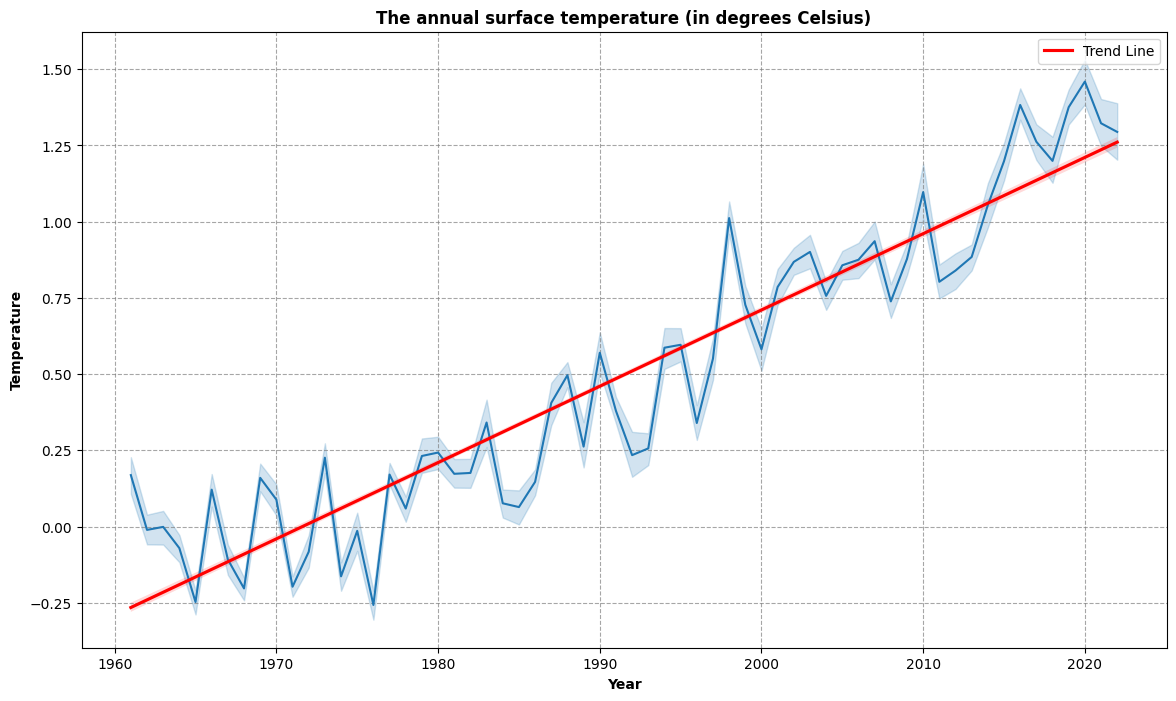

In [13]:
plt.figure(figsize= (14,8))
sns.lineplot(data= df, x = "Year", y ="Temperature in degrees Celsius")
sns.regplot(data = df , x = "Year", y = "Temperature in degrees Celsius", scatter=False, color="red", label="Trend Line")
plt.grid(True, color='grey', linestyle='--', alpha = 0.7)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Temperature', fontweight='bold')
plt.title('The annual surface temperature (in degrees Celsius)', fontweight='bold')
plt.legend()
plt.show()

## Temperature Change Per continent

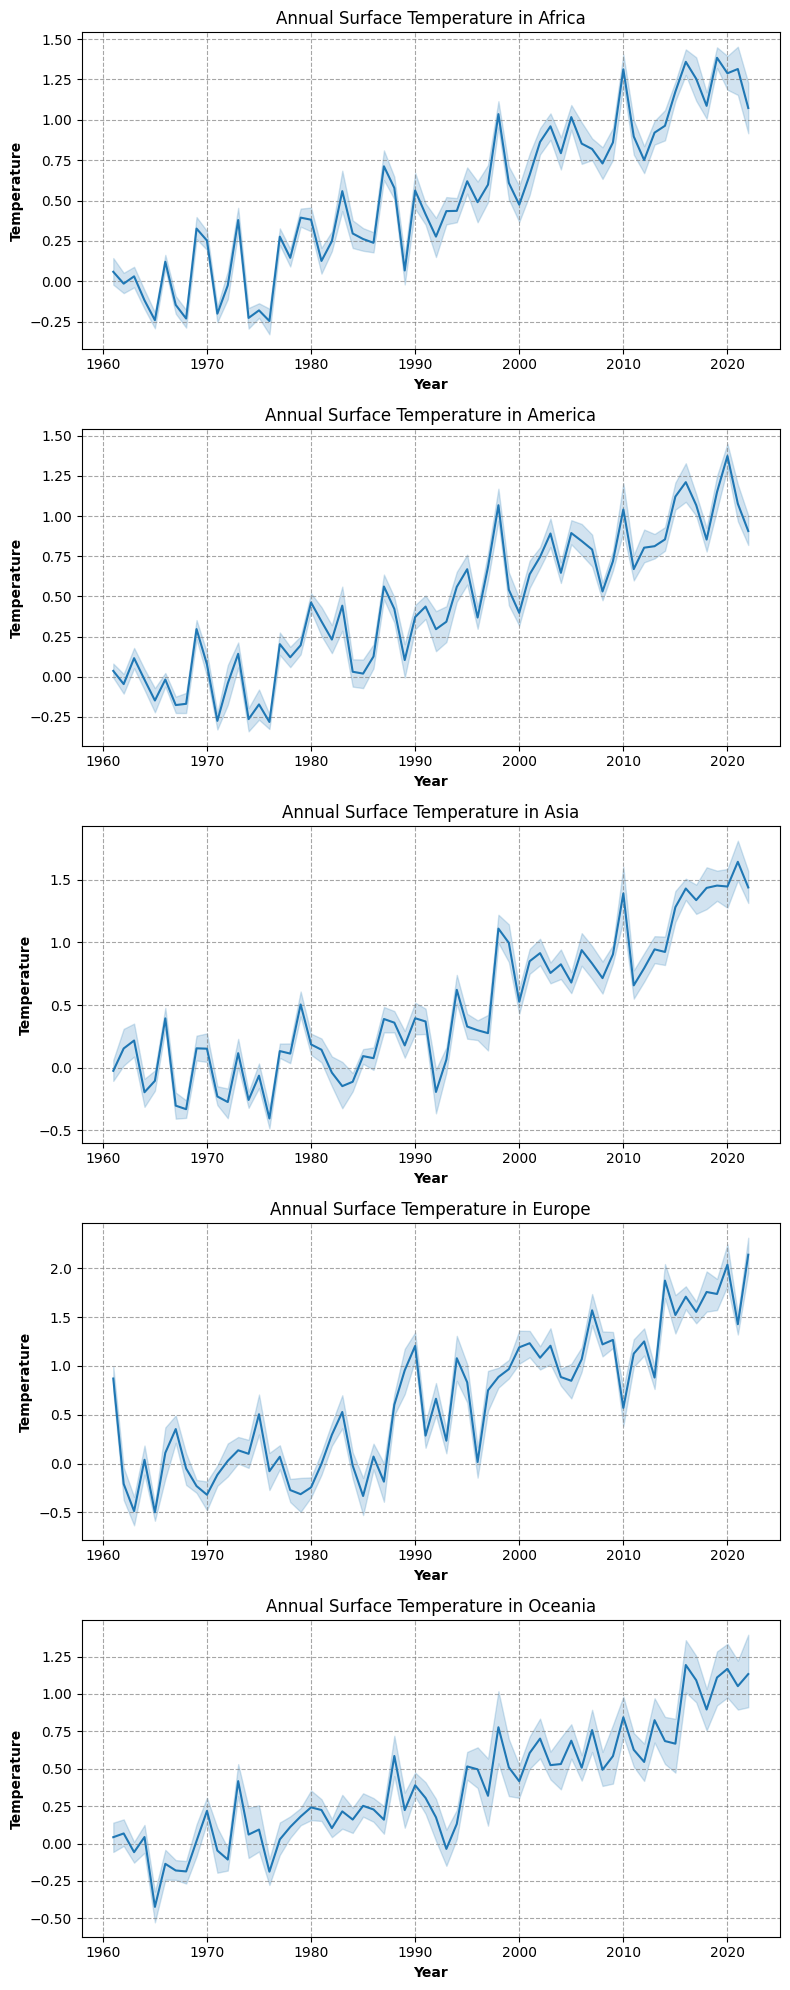

In [14]:

continents = ['Africa', 'America', 'Asia', 'Europe', 'Oceania']

# Create subplots with one column and as many rows as there are continents
fig, axes = plt.subplots(nrows=len(continents), ncols=1, figsize=(8, 4 * len(continents)))

# Loop through each continent and plot the data
for i, continent in enumerate(continents):
    sns.lineplot(data=df[df['Continent'] == continent], x='Year', y='Temperature in degrees Celsius', ax=axes[i])
    axes[i].set_title(f'Annual Surface Temperature in {continent}')
    axes[i].grid(True, color='grey', linestyle='--', alpha=0.7)
    axes[i].set_xlabel('Year', fontweight='bold')
    axes[i].set_ylabel('Temperature', fontweight='bold')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


## Countries with High Temperature Growth

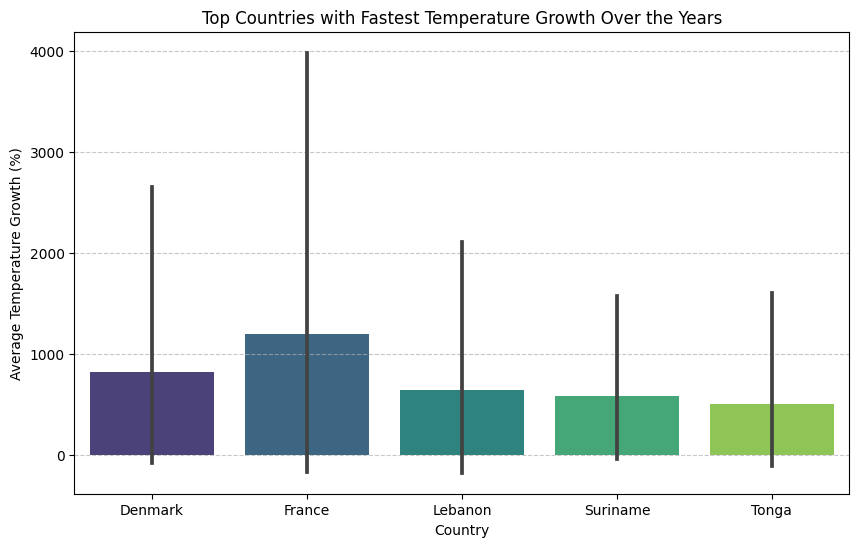

In [16]:
df['Temperature Growth'] = df.groupby('Country')['Temperature in degrees Celsius'].pct_change() * 100

# Get the top N countries with the highest temperature growth
top_countries = df.groupby('Country')['Temperature Growth'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top countries
df_top = df[df['Country'].isin(top_countries)]

# Create a bar plot for each country
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top, x='Country', y='Temperature Growth', palette='viridis')
plt.title('Top Countries with Fastest Temperature Growth Over the Years')
plt.xlabel('Country')
plt.ylabel('Average Temperature Growth (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Temperature Growth In Kenya

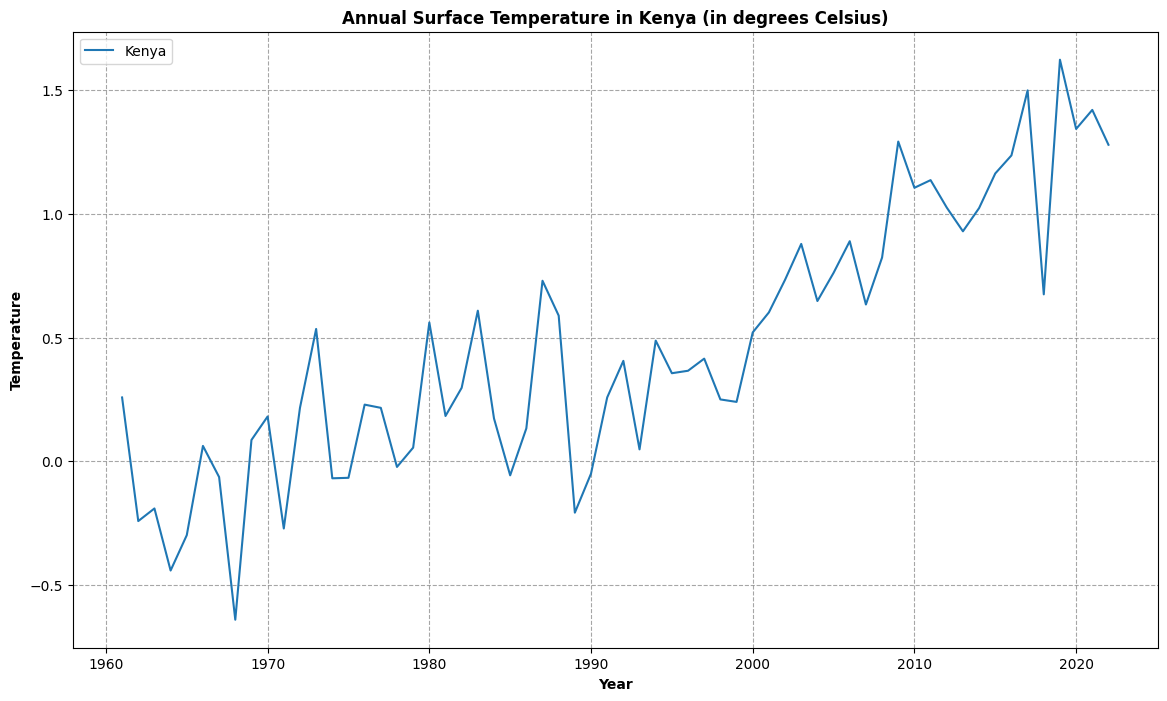

In [20]:
df_kenya = df[df['Country'] == 'Kenya']

# Plot the line and trend line for Kenya
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_kenya, x="Year", y="Temperature in degrees Celsius", label='Kenya')
#sns.regplot(data=df_kenya, x="Year", y="Temperature in degrees Celsius", scatter=False, color="red", label="Trend Line")
plt.grid(True, color='grey', linestyle='--', alpha=0.7)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Temperature', fontweight='bold')
plt.title('Annual Surface Temperature in Kenya (in degrees Celsius)', fontweight='bold')
plt.legend()
plt.show()